## Reproduces Figure 2 in Paper:

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import FancyBboxPatch
import matplotlib.ticker as mtick
import math

from glob import glob

In [2]:
# CHANGE FILE PATH TO FULL.CSV IN FOLDER NAMED "FULL"
df = pd.read_csv("change-file-path-to/reproducibility/full/full.csv")

In [5]:
df = df.reset_index(drop=True)
df

,Unnamed: 0,Paper Title,Author,Link to Paper,Link for Code,Conference,Year,Author Affiliation,ReadMe,Type,...,Hardware,Made for Reproducibility,Funding,Artifact Evaluation,Comments,Unnamed: 20,Unnamed: 21,"4,6",Made Available,Unnamed: 2
0,0,Portability of Deep-Learning Side-Channel Atta...,"Chenggang Wang, Mabon Ninan, Shane Reilly, Joe...",https://dl.acm.org/doi/pdf/10.1145/3558482.359...,https://github.com/UCdasec/SoftPower,WiSec,2023.0,0.0,1.0,1,...,NaN,0.0,"National Science Foundation, NSF IUCRC Center ...",-1,no OS version\nData stored in a sharepoint in ...,WiSec-2023-Portability_of_Deep-Learning_Side-C...,2_WiSec-2023-Portability_of_Deep-Learning,NaN,NaN,NaN
1,1,Transformer-based Extraction of Deep Image Models,"Verena Battis, Alexander Penner",https://ieeexplore.ieee.org/stamp/stamp.jsp?tp...,https://github.com/Fraunhofer-SIT/ModExTransfo...,EuroS&P,2022.0,-1.0,2.0,"1,2",...,NaN,0.0,NaN,-1,NO OS version\nNo Python version\nbroken depen...,EuroS&P-2022-Transformer-based_Extraction_of_D...,3_EuroSP-2022-Transformer-based_Extraction_of,NaN,NaN,NaN
2,2,GRAPHITE: Generating Automatic Physical Exampl...,"Ryan Feng, Neal Mangaokar, Jiefeng Chen, Earle...",https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,https://github.com/ryan-feng/GRAPHITE,EuroS&P,2022.0,0.0,2.0,"1,2",...,NaN,0.0,"DARPA, Air Force, NSF, ARO, Wisconsin Alumni R...",-1,"No OS, No Python\nMissing packaging (python) d...",EuroS&P-2022-GRAPHITE:_Generating_Automatic_Ph...,4_EuroSP-2022-GRAPHITE_Generating_Automatic,NaN,NaN,NaN
3,3,BFU: Bayesian Federated Unlearning with Parame...,"Weiqi Wang,Zhiyi Tian,Chenhan Zhang,An Liu,Shu...",https://dl.acm.org/doi/pdf/10.1145/3579856.359...,https://github.com/wwq5-code/BFU-Code,AsiaCCS,2023.0,0.0,1.0,"1,2",...,NaN,0.0,Australian Research Council,-1,No OS version\nScripts have a path error to .p...,AsiaCCS-2023-BFU:_Bayesian_Federated_Unlearnin...,5_AsiaCCS-2023-BFU_Bayesian_Federated,NaN,NaN,NaN
4,4,Reconstruction Attack on Differential Private ...,"Erik Buchholz, Alsharif Abuadbba, Shuo Wang, S...",https://dl.acm.org/doi/pdf/10.1145/3564625.356...,https://github.com/erik-buchholz/RAoPT,ACSAC,2022.0,8.0,2.0,1,...,NaN,0.0,NaN,0,Errors on their unit test script (missing cust...,ACSAC-2022-Reconstruction_Attack_on_Differenti...,6_ACSAC-2022-Reconstruction_Attack_on,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,287,MS-PTP: Protecting Network Timing from Byzanti...,NaN,NaN,NaN,WiSec,2023.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,292,VSMask: Defending Against Voice Synthesis Atta...,NaN,NaN,NaN,WiSec,2023.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,294,Short Paper: European 5G Security in the Wild:...,NaN,NaN,NaN,WiSec,2023.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,296,Short Paper: BigMac Performance Overhead of Us...,NaN,NaN,NaN,WiSec,2023.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
inner_radius_modify = 1.1
inner_text_radius = 1

# colors

palette = 'orangeblue'
if palette is "blue":
    conf_colors_dict = {
        'ACSAC':'steelblue' ,
        'WiSec': 'skyblue',
        'EuroS&P': 'paleturquoise',
        'AsiaCCS': 'cornflowerblue'
    }
elif palette is "orangeblue":
    conf_colors_dict = {
        'ACSAC':'#E8891D' ,
        'WiSec': '#B35A20',
        'EuroS&P': '#05a3a4',
        'AsiaCCS': '#006373'
    }

if palette is 'blue':
    small_palette = [
        'mediumaquamarine',
        'royalblue',
        'mediumpurple'
    ]
elif palette is 'orangeblue':
    small_palette = [
        '#006373',
        '#E8891D',
#         '#219ebc',
        '#05A3A4',
        '#EA652C'
    ]

<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:22: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:28: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:22: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:28: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/st/293fz_dj6651kb2w_fsgr6fx7894dv/T/ipykernel_71581/110724650.py:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if palette is "blue":
/var/folders/st/293fz_dj6651kb2w_fsgr6fx7894dv/T/ipykernel_71581/110724650.py:14: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif palette is "orangeblue":
/var/folders/st/293fz_dj6651kb2w_fsgr6fx7894dv/T/ipykernel_71581/110724650.py:22: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if palette is 'blue':
/var/folders/st/

Conference  Available
ACSAC       0            396
            1            236
            2              1
AsiaCCS     0            657
            1            134
            2              1
EuroS&P     0            204
            1             88
WiSec       0            223
            1             78
dtype: int64

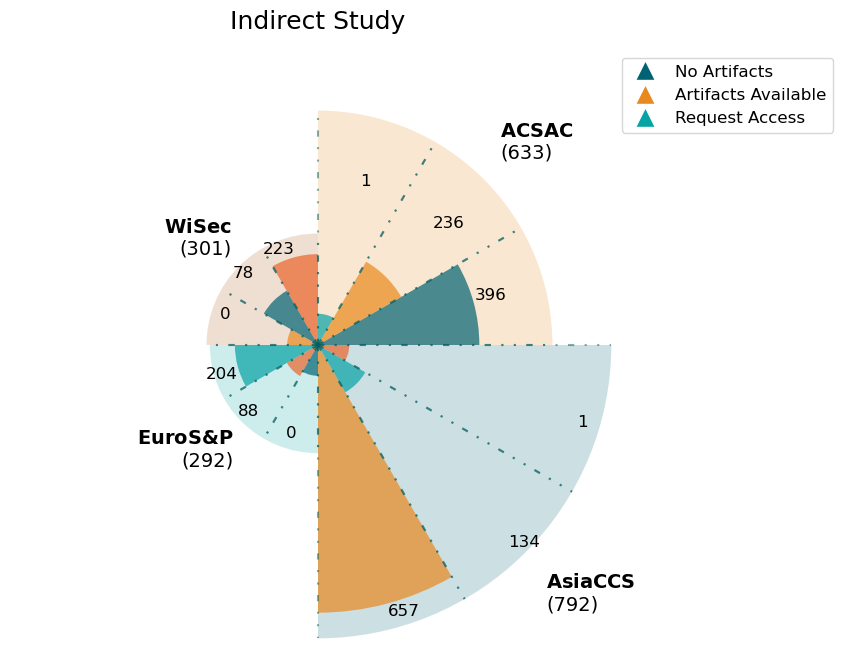

In [8]:
# conf_dict = {
#     "ACSAC":"ACSAC",
#     "USEN":"Usenix",
#     "ACM": "CCS",
#     "NDSS":"NDSS",
#     "CCS":"CCS",
#     "S&P":"S&P",
#     "Usenix":"Usenix"
# }
    
# df["Conference"] = [conf_dict[c.upper()[0:4].strip()] for c in df["Conference"]]

# df = df[~df.Available.isna()]

# df['Available'] = np.where(~df['Link for Code'].isnull(),df['Link for Code'],df['Available'])

for index, row in df.iterrows():
    if (pd.notna(row['Link for Code'])) & (pd.isnull(row['Available'])):
        df.at[index, 'Available'] = 2
    else:
        pass

df['Available'] = df['Available'].fillna(-1)
df['Available'] = df['Available'].astype(str)

df['Available'] = df['Available'].str.split(',').str[0]
df['Available'] = df['Available'].str.replace(r"^(\d+),", r"\1", regex=True)
df['Available'] = df['Available'].str.replace(r"[A-Za-z:()]", "", regex=True)
df['Available'] = df['Available'].replace("NaN", np.nan)
df['Available'] = df['Available'].replace(np.nan, 2)
df['Available'] = df['Available'].replace(' ',np.nan).fillna(1)
df['Available'] = df['Available'].replace(' ', -1, regex=True)

df['Available'] = df['Available'].astype(float)
df['Available'] = df['Available'].astype(int)
#map for polar coordinates
# of the conferences
coord_dict = {
    'ACSAC': 0,
    'WiSec': np.pi/2,
    'EuroS&P': np.pi,
    'AsiaCCS': 3*np.pi/2
}
confs = coord_dict.keys()
# create table grouping

df_conf_radi = df.groupby(["Conference"]).size()
df_width = np.pi/2*np.ones(4)

# May have to adjust the radius for this
conf_radi = [df_conf_radi[a] for a in confs]

#
# ax.axis("off")


conf_colors = [conf_colors_dict[a] for a in confs]
plt.rcParams["figure.figsize"] = (8,8)
ax = plt.subplot(projection='polar')
ax.spines['polar'].set_visible(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(False)
ax.bar(coord_dict.values(),conf_radi, color=conf_colors,width=df_width, bottom=0.0, alpha=0.2, align='edge')


def convert_label(x):
    if x == -1:
        return 0
    elif x >= 0 and x <= 2:
        return 1
    elif x == 3 :
        return 2
    elif x == 4:
        return 1
#     elif x==8:
#         return 0
#     elif x== 7:
#         return 2
    else:
        return x
df_temp = df.copy()
df_temp["Available"] = df_temp["Available"].apply(convert_label)
df_group = df_temp.groupby(["Conference","Available"]).size()
display(df_group)

# build the initial offsets
slice_len = 3 ###len(df_group.Available.unique()) 
small_radi = np.zeros(4*slice_len)
angle = np.linspace(0, np.pi/2, slice_len, endpoint=False)
small_angle = np.ones(4*slice_len)
small_width = np.ones(4*slice_len)*np.pi/2/slice_len
for i,c in enumerate(confs):
    for d in df_group[c].keys():
        small_radi[i*slice_len + d] = df_group[c][d]*inner_radius_modify
    for d in range(slice_len):
        small_angle[i*slice_len +d] = angle[d]+i*np.pi/2


small_colors = np.tile(small_palette,4)
# Scale small boxes so we can see them
ave = np.mean(small_radi)

small_radi_mod = [s if s > 0.5*ave else s + 0.45*ave for s in small_radi ]
ax.bar(small_angle,small_radi_mod, width=small_width,color=small_colors, bottom=0.0, alpha=0.7, align='edge') 

## LABELS

#Conference labels
#label_rad = max(conf_radi)*1.4 ## we will have to fix this, but works for now
alignments = {
    'ACSAC':['bottom','left' ],
    'WiSec': ['bottom','right' ],
    'EuroS&P': ['top','right' ],
    'AsiaCCS':['top','left' ]
}
for c in confs:
    ax.text(coord_dict[c]+np.pi/4,df_conf_radi[c]*1.1,r"$\bf{" + c + "}$"+"\n({})".format(df_conf_radi[c]), 
            verticalalignment=alignments[c][0], 
            horizontalalignment=alignments[c][1],
            fontsize=14
           )
    
## Paper labels
lines_theta=[]
lines_rad = []
small_label_size = 12
for r, a,c in zip(small_radi,small_angle,np.repeat(list(confs),slice_len)):
    #Labels
    if r >2:
        ax.text(a+small_width[0]/2, max(df_group[c])*np.square(inner_text_radius+0.05), "{:.0f}".format(r/inner_radius_modify),
               verticalalignment=alignments[c][0], 
               horizontalalignment=alignments[c][1],
               fontsize=small_label_size)
    else:
        ax.text(a+small_width[0]/2, max(df_group[c])*np.square(inner_text_radius+0.05), "{:.0f}".format(r),
               verticalalignment=alignments[c][0], 
               horizontalalignment=alignments[c][1],
               fontsize=small_label_size)
    #Dotted Line
    # first one
    d_theta = [a,a]
    lines_theta.append(d_theta)
    d_rad = [0,df_conf_radi[c]]
    lines_rad.append(d_rad)
    # second one
    d_theta = [a+small_width[0],a+small_width[0]]
    lines_theta.append(d_theta)
    d_rad = [0,df_conf_radi[c]]
    lines_rad.append(d_rad)
## dotted lines
for dl in range(len(lines_theta)):
    ax.plot(lines_theta[dl],lines_rad[dl],linestyle=(0, (3, 5, 1, 5, 1, 5)), color='#005F60',alpha=0.5)

##Create Custom Legend
legend_elements = [
    # No Code
    Line2D (
        [0],[0], marker='^',color='w',markerfacecolor=small_palette[0],label='No Artifacts',
        markersize=15
    ),
    # Code
    Line2D (
        [0],[0], marker='^',color='w',markerfacecolor=small_palette[1],label='Artifacts Available',
        markersize=15
    ),
    # Request Access
    Line2D (
        [0],[0], marker='^',color='w',markerfacecolor=small_palette[2],label='Request Access',
        markersize=15
    ),
]

ax.legend(handles=legend_elements, loc='upper left',bbox_to_anchor=(0.98,0.98),prop={'size': 12})
#TITLE
ax.set_title(
    "Indirect Study",
    fontsize=18
)

# plt.savefig("Indirect.pdf",bbox_inches='tight')

## Reproduces Figure 3 in Paper:

In [10]:
def fixavail(x):
    x = "{}".format(x)
    if "2" in x:
        return 2
    if 'google drive' in x.lower():
        return 2
    if '4' in x:
        return 4
    if '3' in x:
        return 3
    if 'Bitbucket'in x:
        return 0
    if 'nan' in x:
        return -1
    if 'research' in x.lower():
        return 2
    return float(x)

<>:114: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:121: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:171: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:177: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:114: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:121: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:171: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:177: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/st/293fz_dj6651kb2w_fsgr6fx7894dv/T/ipykernel_71581/2646404737.py:114: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if palette is "blue":
/var/folders/st/293fz_dj6651kb2w_fsgr6fx7894dv/T/ipykernel_71581/2646404737.py:121: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif palette is "orangeblue":


Conference  Compiles
ACSAC       0            58
            1            35
            2           101
            3            22
AsiaCCS     0            23
            1            17
            2            74
            3            13
EuroS&P     0            21
            1             9
            2            43
            3             9
WiSec       0             9
            1             5
            2            32
            3            18
dtype: int64

/var/folders/st/293fz_dj6651kb2w_fsgr6fx7894dv/T/ipykernel_71581/2646404737.py:171: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if palette is 'blue':
/var/folders/st/293fz_dj6651kb2w_fsgr6fx7894dv/T/ipykernel_71581/2646404737.py:177: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif palette is 'orangeblue':


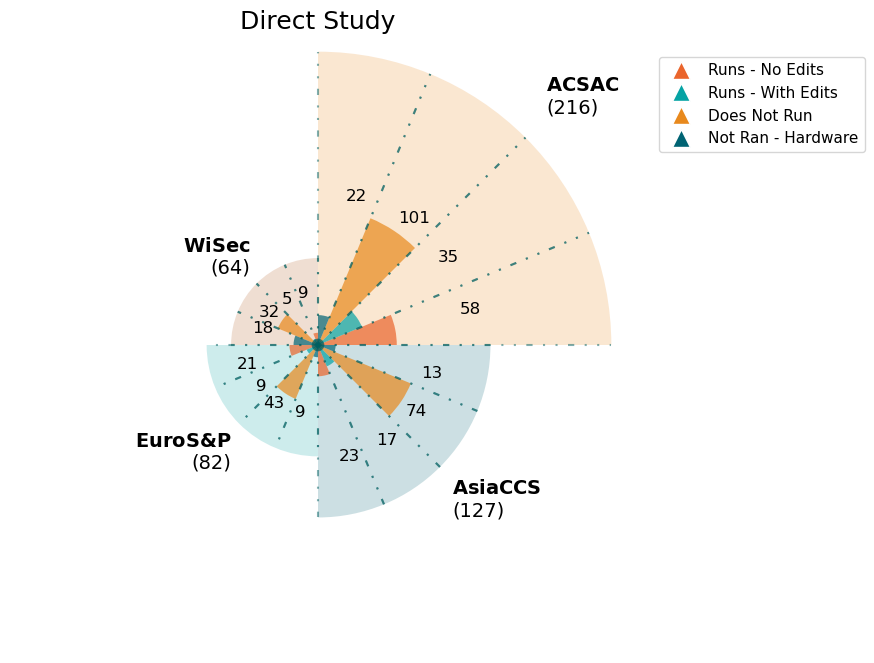

In [11]:
df = pd.read_csv("change-file-path-to/reproducibility/full/full.csv")
df = df.dropna(subset=['Paper Title'])

## need to add a conversion for df['available'] larger then
df = df[~df['Available'].isna()]
df = df[~df['Compiles'].isna()]

df['Compiles'] = df['Compiles'].apply(fixavail)
df['Available'] = df['Available'].apply(fixavail)


df['Available'] = df['Available'].astype(str)


df['Available'] = df['Available'].astype(str)
df['Compiles'] = df['Compiles'].astype(str)


df['Available'] = df['Available'].astype(float)
df['Available'] = df['Available'].astype(int)


def get_tools(ava, run):
    
    if (ava != -1 and ava != 3 and ava != 2):
        if (run == -1) or (run == 2):
            return 2
        else:
            return run
    if ava == 2 and run == -1:
        return 2
    if run == 4:
        return 2
    if run == 5:
        return 3
    else:
        return run
    
df['Compiles'] = df['Compiles'].astype(float)
df['Compiles'] = df['Compiles'].astype(int)

df['Available'] = df['Available'].astype(float)
df['Available'] = df['Available'].astype(int)

df['Compiles'] = df.apply(lambda x: get_tools(x['Available'],x['Compiles']), axis=1)

#map for polar coordinates
# of the conferences
coord_dict = {
    'ACSAC': 0,
    'WiSec': np.pi/2,
    'EuroS&P': np.pi,
    'AsiaCCS': 3*np.pi/2
}
confs = coord_dict.keys()
# create table grouping
# df[df['Available']>-1].groupby(['Conference','Compiles']).size()

df = df[df.Compiles>-1]
df = df[df.Available>-1]

df_conf_radi = df.groupby(["Conference"]).size()
df_width = np.pi/2*np.ones(4)

# May have to adjust the radius for this
conf_radi = [df_conf_radi[a] for a in confs]

#
# ax.axis("off")
palette = 'orangeblue'
if palette is "blue":
    conf_colors_dict = {
        'ACSAC':'steelblue' ,
        'WiSec': 'skyblue',
        'EuroS&P': 'paleturquoise',
        'AsiaCCS': 'cornflowerblue'
    }
elif palette is "orangeblue":
    conf_colors_dict = {
        'ACSAC':'#E8891D' ,
        'WiSec': '#B35A20',
        'EuroS&P': '#05a3a4',
        'AsiaCCS': '#006373'
    }

conf_colors = [conf_colors_dict[a] for a in confs]
plt.rcParams["figure.figsize"] = (8,8)
ax = plt.subplot(projection='polar')
ax.spines['polar'].set_visible(False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(False)
ax.bar(coord_dict.values(),conf_radi, color=conf_colors,width=df_width, bottom=0.0, alpha=0.2, align='edge')


df_temp = df.copy()
df_group = df_temp.groupby(["Conference","Compiles"]).size()
display(df_group)

# build the initial offsets
slice_len = 4
small_radi = np.zeros(4*slice_len)
angle = np.linspace(0, np.pi/2, slice_len, endpoint=False)
small_angle = np.ones(4*slice_len)
small_width = np.ones(4*slice_len)*np.pi/2/slice_len
for i,c in enumerate(confs):
    for d in df_group[c].keys():
        small_radi[i*slice_len + d] = df_group[c][d]
    for d in range(slice_len):
        small_angle[i*slice_len + d] = angle[d]+i*np.pi/2
if palette is 'blue':
    small_palette = [
        'mediumaquamarine',
        'royalblue',
        'mediumpurple'
    ]
elif palette is 'orangeblue':
    small_palette = [
        '#006373',
        '#E8891D',
        '#05A3A4',
        '#EA652C'
        
        
        
    ]
small_palette = np.flip(small_palette)
    
small_colors = np.tile(small_palette,3)
ax.bar(small_angle,small_radi, width=small_width,color=small_colors, bottom=0.0, alpha=0.7, align='edge') 

## LABELS

#Conference labels
#label_rad = max(conf_radi)*1.4 ## we will have to fix this, but works for now
alignments = {
    'ACSAC':['bottom','left' ],
    'WiSec': ['bottom','right' ],
    'EuroS&P': ['top','right' ],
    'AsiaCCS':['top','left' ]
}
for c in confs:
    ax.text(coord_dict[c]+np.pi/4,df_conf_radi[c]*1.1,r"$\bf{" + c + "}$"+"\n({})".format(df_conf_radi[c]), 
            verticalalignment=alignments[c][0], 
            horizontalalignment=alignments[c][1],
            fontsize=14
           )
    
## Paper labels
lines_theta=[]
lines_rad = []
small_label_size = 12
for r, a,c in zip(small_radi,small_angle,np.repeat(list(confs),slice_len)):
    #Labels
    if r >2:
        ax.text(a+small_width[0]/2, max(df_group[c])*1.05, "{:.0f}".format(r),
               verticalalignment=alignments[c][0], 
               horizontalalignment=alignments[c][1],
               fontsize=small_label_size)
    else:
        ax.text(a+small_width[0]/2, max(df_group[c])*1.05, "{:.0f}".format(r),
               verticalalignment=alignments[c][0], 
               horizontalalignment=alignments[c][1],
               fontsize=small_label_size)
    #Dotted Line
    # first one
    d_theta = [a,a]
    lines_theta.append(d_theta)
    d_rad = [0,df_conf_radi[c]]
    lines_rad.append(d_rad)
    # second one
    d_theta = [a+small_width[0],a+small_width[0]]
    lines_theta.append(d_theta)
    d_rad = [0,df_conf_radi[c]]
    lines_rad.append(d_rad)
## dotted lines
for dl in range(len(lines_theta)):
    ax.plot(lines_theta[dl],lines_rad[dl],linestyle=(0, (3, 5, 1, 5, 1, 5)), color='#005F60',alpha=0.5)

##Create Custom Legend
legend_elements = [
    # No Code
    Line2D (
        [0],[0], marker='^',color='w',markerfacecolor=small_palette[0],label='Runs - No Edits',
        markersize=13
    ),
    # Code
    Line2D (
        [0],[0], marker='^',color='w',markerfacecolor=small_palette[1],label='Runs - With Edits',
        markersize=13
    ),
    # Request Access
    Line2D (
        [0],[0], marker='^',color='w',markerfacecolor=small_palette[2],label='Does Not Run',
        markersize=13
    ),
    Line2D (
        [0],[0], marker='^',color='w',markerfacecolor=small_palette[3],label='Not Ran - Hardware',
        markersize=13
    ),
]

ax.legend(handles=legend_elements, loc='upper right',bbox_to_anchor=(1.4,0.98),prop={'size': 11})
#TITLE
ax.set_title(
    "Direct Study",
    fontsize=18
)

# plt.savefig("Direct.pdf",bbox_inches='tight')